# Proyecto 2 - 3 Introducción a la Ciencia de Datos
## Elaborado por:
- Juan Sebastián Gómez Agudelo - 2259474
- Stiven Henao Aricapa - 2259603
- Víctor Manuel Hernández Ortíz - 2259520

# 2. Limpieza y Normalización de Datos
La limpieza y normalización de datos son etapas fundamentales en todo proyecto de ciencia de datos, ya que aseguran que los modelos de aprendizaje automático trabajen sobre información confiable y estructurada.  
Un dataset limpio evita sesgos, errores de predicción y permite que los algoritmos encuentren patrones reales en los datos.  
Además, la normalización facilita que los modelos converjan más rápido y de manera más eficiente, especialmente en aquellos que son sensibles a la escala de los datos.

# Importación de librerías y carga del dataset

Se importaron las principales librerías de análisis y visualización de datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Posteriormente, se carga el conjunto de datos para así obtener la visualización inicial del DataFrame permitiendo verificar la estructura de los datos, tipos de variables y detectar posibles anomalías de forma temprana.


In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Eliminación de columnas innecesarias
Se identificó y eliminó la columna `Unnamed: 0`, la cual es un índice automático generado en la exportación del archivo CSV y no aporta información útil para el análisis.

In [3]:
df = df.drop(columns=["Unnamed: 0"])

### Análisis de valores nulos
Se analizó la existencia de valores faltantes en el dataset mediante un mapa de calor

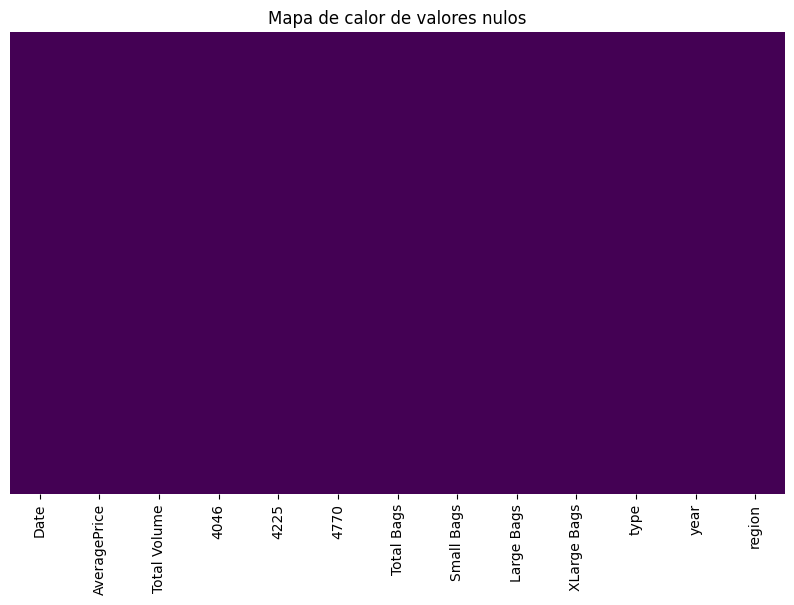

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

El mapa de calor permitió confirmar visualmente que no existen valores nulos significativos en el conjunto de datos lo que es crucial, ya que su presencia puede sesgar el entrenamiento de los modelos, generar errores o reducir la calidad de las predicciones.

## Normalización de variables categóricas
Se procedió a la normalización de las variables categóricas `type` y `region` para asegurar una representación estandarizada y consistente de los datos.

In [5]:
df["type"] = df["type"].str.strip().str.upper()
import re
df["region"] = (
    df["region"]
    .str.strip("-")
    .apply(lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x))  # Inserta _ antes de mayúsculas no iniciales
    .str.upper()
)


### Exploración de variables categóricas

Se analizaron las distribuciones de las variables categóricas `type` y `region` mediante conteos de frecuencia:

In [6]:
df.type.value_counts()

type
CONVENTIONAL    9126
ORGANIC         9123
Name: count, dtype: int64

In [7]:
df.region.value_counts()

region
ALBANY                  338
ATLANTA                 338
BALTIMORE_WASHINGTON    338
BOISE                   338
BOSTON                  338
BUFFALO_ROCHESTER       338
CALIFORNIA              338
CHARLOTTE               338
CHICAGO                 338
CINCINNATI_DAYTON       338
COLUMBUS                338
DALLAS_FT_WORTH         338
DENVER                  338
DETROIT                 338
GRAND_RAPIDS            338
GREAT_LAKES             338
HARRISBURG_SCRANTON     338
HARTFORD_SPRINGFIELD    338
HOUSTON                 338
INDIANAPOLIS            338
JACKSONVILLE            338
LAS_VEGAS               338
LOS_ANGELES             338
LOUISVILLE              338
MIAMI_FT_LAUDERDALE     338
MIDSOUTH                338
NASHVILLE               338
NEW_ORLEANS_MOBILE      338
NEW_YORK                338
NORTHEAST               338
NORTHERN_NEW_ENGLAND    338
ORLANDO                 338
PHILADELPHIA            338
PHOENIX_TUCSON          338
PITTSBURGH              338
PLAINS       

### Conversión de la columna Date a tipo datetime
Se agrega una variable temporal numérica para facilitar que los modelos puedan interpretar el paso del tiempo como un valor continuo, mejorando su capacidad predictiva en problemas donde la evolución temporal puede ser relevante.

In [8]:
#Convierto la columna de fechas a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

#Saco la fecha del primero registro
fecha_mas_antigua = df['Date'].min()
print("La fecha más antigua:", fecha_mas_antigua)

#Agrego la columna de dias desde el primer registro
df['Dias_Desde_Primer_Registro'] = (df['Date'] - fecha_mas_antigua).dt.days
df.head()

La fecha más antigua: 2015-01-04 00:00:00


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Dias_Desde_Primer_Registro
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,CONVENTIONAL,2015,ALBANY,357
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,CONVENTIONAL,2015,ALBANY,350
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,CONVENTIONAL,2015,ALBANY,343
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,CONVENTIONAL,2015,ALBANY,336
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,CONVENTIONAL,2015,ALBANY,329


### Renombrar columnas de tamaños de aguacates
Se cambiaron los nombres de las columnas que contenían códigos numéricos (`4046`, `4225`, `4770`) por nombres descriptivos para facilitar la interpretación de los datos y mejora la legibilidad del análisis, evitando confusiones durante el modelado o la comunicación de resultados.

In [9]:
df.rename(columns={'4046': 'Pequeño/Mediano', '4225': 'Grande', '4770': 'Extra Grande'}, inplace=True)
df

,Date,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Dias_Desde_Primer_Registro
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,CONVENTIONAL,2015,ALBANY,357
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,CONVENTIONAL,2015,ALBANY,350
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,CONVENTIONAL,2015,ALBANY,343
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,CONVENTIONAL,2015,ALBANY,336
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,CONVENTIONAL,2015,ALBANY,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1127
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1120
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1113
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1106


### Análisis de la variable Total Volume
Se realizó un análisis visual de la distribución del volumen total de ventas para identificar valores atípicos, es esencial para decidir si deben ser tratados, ya que pueden influir desproporcionadamente en los modelos predictivos.
Este análisis visual permite entender la dispersión y detectar anomalías de forma rápida y efectiva.


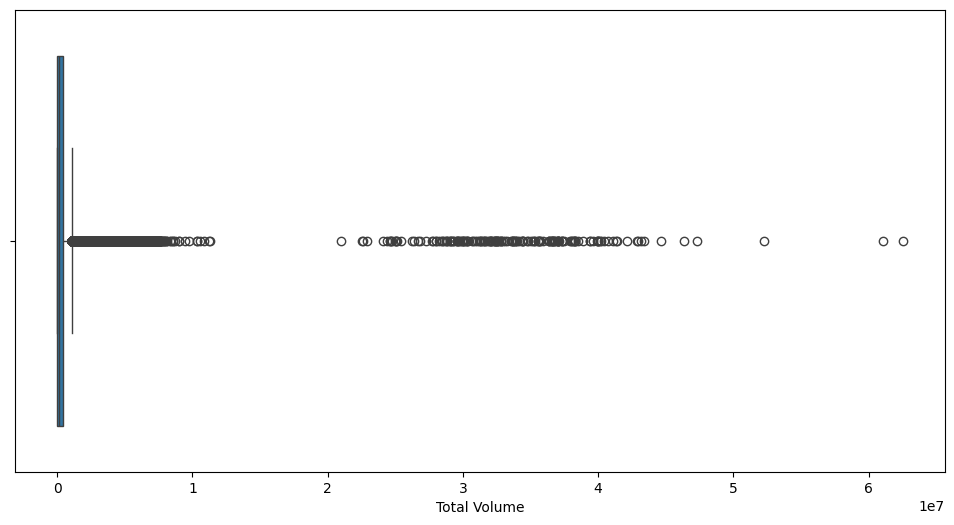

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total Volume'])
plt.show()

El análisis visual a través del boxplot de la variable `Total Volume` permitió identificar una **alta concentración de datos en valores bajos** y la presencia de **numerosos valores atípicos** (outliers) a lo largo de la escala.

**Observaciones:**
- El volumen total de ventas muestra una distribución altamente sesgada hacia valores pequeños.
- Existen valores extremos (mayores a 20 millones) que aparecen de forma aislada.
- La dispersión es muy amplia, lo que puede afectar negativamente el rendimiento de los modelos predictivos si no se corrige.


## Detección y eliminación de valores atípicos en `Total Volume`

Se utilizó el método del rango intercuartílico (IQR) para identificar y eliminar valores atípicos permitiendo eliminar únicamente aquellas observaciones que se consideran extremos estadísticamente, preservando la estructura general de los datos.

In [11]:
Q1, Q3 = df['Total Volume'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf, lim_sup)

-622346.985 1066147.855


Posteriormente, se filtraron los datos:

In [12]:
df = df[(df['Total Volume'] >= lim_inf) & (df['Total Volume'] <= lim_sup)] 

### Reanálisis de la variable Total Volume tras limpieza
Se volvió a graficar el boxplot para observar la nueva distribución después de eliminar los outliers:

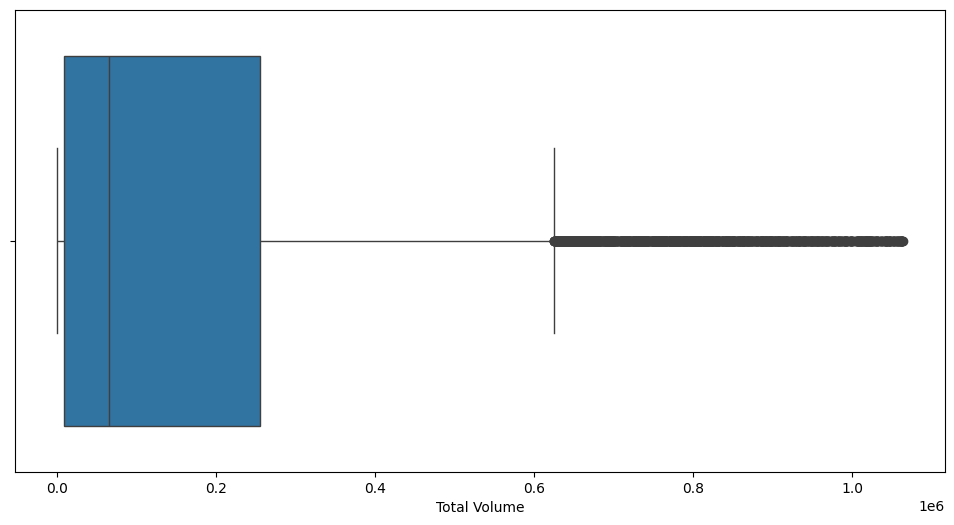

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total Volume'])
plt.show()

El boxplot de `Total Volume` posterior a la limpieza muestra una concentración evidente de los datos en volúmenes bajos, con algunos valores aún dispersos hacia la derecha. Se evidencia que, tras eliminar los valores atípicos más extremos, la mayoría de los registros se encuentran dentro de un rango mucho más manejable, mejorando así la homogeneidad del dataset para el modelado predictivo.

## Distribución de `Total Volume` sin outliers

Se graficó la distribución de `Total Volume` después de eliminar los valores atípicos para confirmar visualmente que la eliminación de outliers no alteró la estructura principal del dataset, conservando las tendencias generales de los datos.

Text(0.5, 1.0, 'Distribución de Total Volume sin outliers')

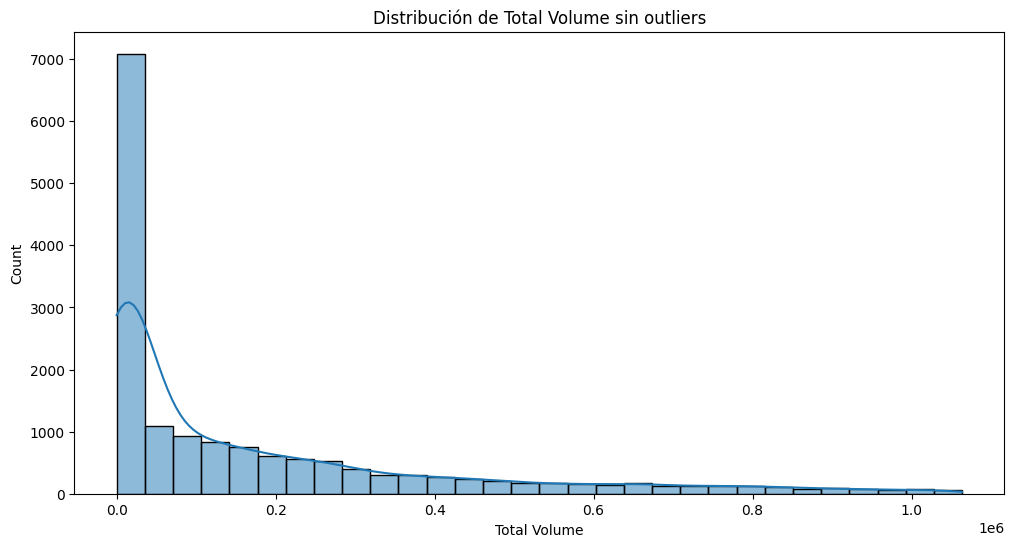

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Volume'], bins=30, kde=True)
plt.title("Distribución de Total Volume sin outliers")

El histograma y la curva KDE de `Total Volume` sin outliers reflejan una distribución altamente sesgada hacia la derecha, donde la mayoría de las ventas corresponden a volúmenes bajos. Esta gráfica confirma que la estructura natural de los datos se mantiene tras la limpieza, y que el dataset representa adecuadamente la concentración real de las ventas en el mercado analizado.

#### Revisión del número de datos tras la limpieza
Se verificó cuántos registros se mantuvieron después de la eliminación de outliers

In [15]:
df.count()

Date                          15952
AveragePrice                  15952
Total Volume                  15952
Pequeño/Mediano               15952
Grande                        15952
Extra Grande                  15952
Total Bags                    15952
Small Bags                    15952
Large Bags                    15952
XLarge Bags                   15952
type                          15952
year                          15952
region                        15952
Dias_Desde_Primer_Registro    15952
dtype: int64

### Análisis de Total Bags (antes de limpieza)

Se realizó un primer análisis visual de la variable Total Bags para detectar valores atípicos y analizarlos ya que podrían sesgar las predicciones relacionadas al volumen de ventas empaquetadas.


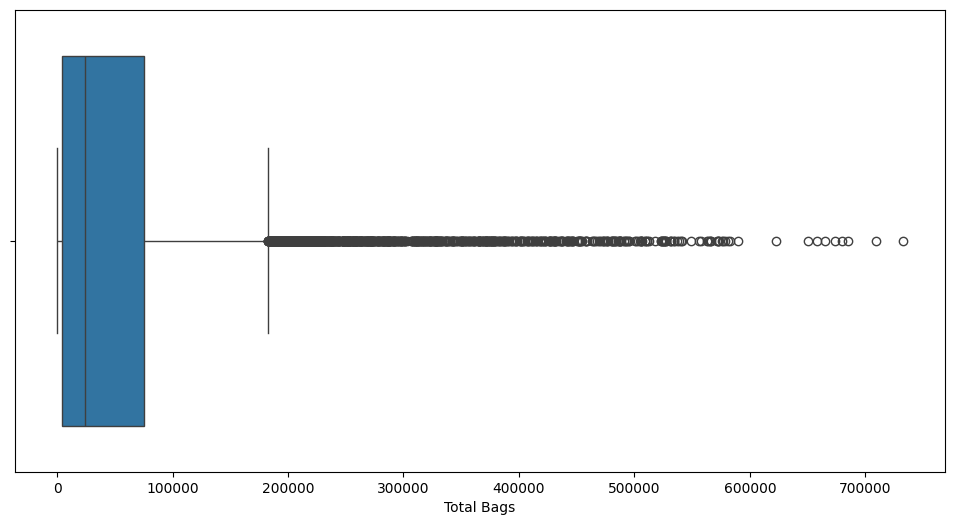

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total Bags'])
plt.show()

El boxplot de `Total Bags` antes de la limpieza evidencia una gran cantidad de valores atípicos hacia la derecha, indicando que existían registros con volúmenes de bolsas inusualmente altos. Esta dispersión podría afectar la estabilidad de los modelos si no se controla, justificando así la necesidad de aplicar una estrategia de eliminación de outliers también en esta variable.

## Detección y eliminación de valores atípicos en `Total Bags`
Se aplicó el mismo procedimiento de rango intercuartílico (IQR) para `Total Bags`:

In [17]:

Q1, Q3 = df['Total Bags'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf_total_bags, lim_sup_total_bags = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf_total_bags, lim_sup_total_bags)

-103279.85749999998 182562.7425


Después se filtraron los datos:

In [18]:
df = df[(df['Total Bags'] >= lim_inf_total_bags) & (df['Total Bags'] <= lim_sup_total_bags)] ## se eliminan los valores atipicos

## Reanálisis de Total Bags tras limpieza
Se graficó nuevamente el boxplot para verificar la distribución para evidenciar la mejora de la calidad de los datos y se garantiza que las relaciones detectadas por los modelos sean genuinas y no estén dominadas por casos extremos aislados.

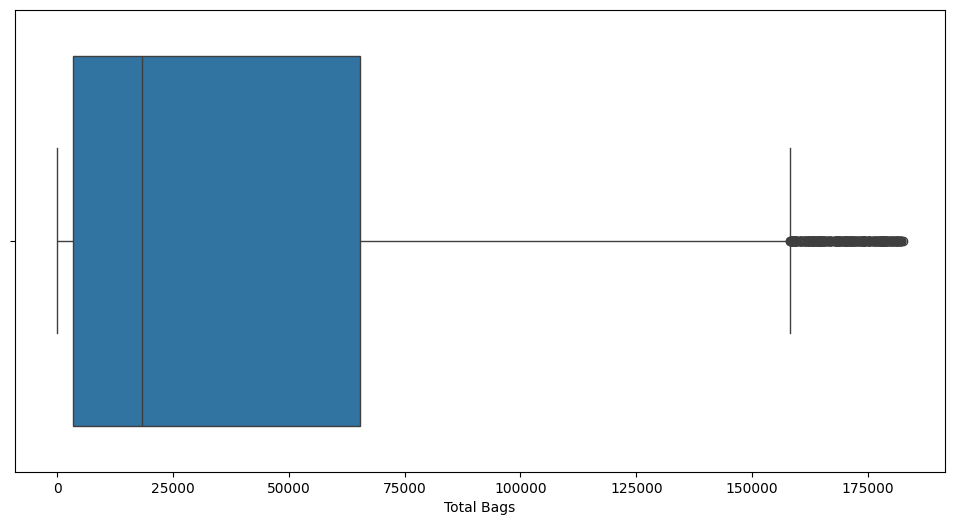

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total Bags'])
plt.show()

Tras la eliminación de outliers, el boxplot de `Total Bags` muestra una dispersión mucho más controlada, con la mayoría de los datos concentrados en un rango bajo de volúmenes. Esta mejora en la distribución permite construir modelos predictivos más robustos, al reducir el impacto de observaciones extremas que podrían sesgar los resultados.

### Distribución de `Total Bags` sin outliers
Se graficó la distribución de `Total Bags` después de eliminar los valores atípicos:

Text(0.5, 1.0, 'Distribución de Total Bags sin outliers')

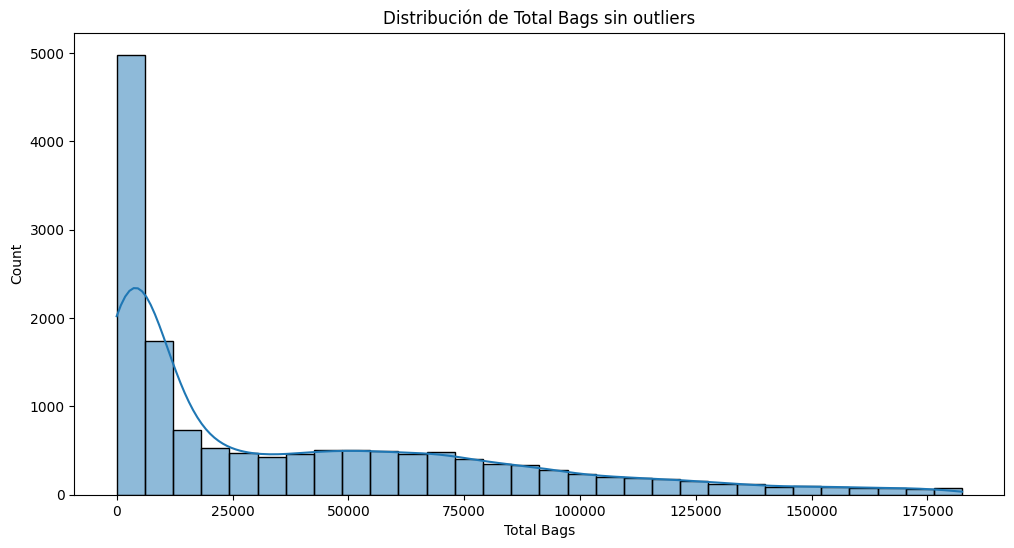

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Bags'], bins=30, kde=True)
plt.title("Distribución de Total Bags sin outliers")

La distribución de `Total Bags` tras la eliminación de valores atípicos muestra una fuerte concentración de datos en volúmenes bajos, con una caída progresiva a medida que aumentan los valores. Aunque persiste un sesgo a la derecha, la curva de densidad es ahora más suave y continua, indicando que la limpieza de outliers permitió estabilizar la variable sin perder su tendencia natural. Esta transformación mejora significativamente la calidad del dataset para el modelado predictivo, reduciendo la influencia de casos extremos sin alterar el comportamiento general de las ventas de bolsas de aguacate.

#### Revisión del número de datos tras la limpieza
Se verificó cuántos registros se mantuvieron después de la eliminación de outliers

In [21]:
df.count()

Date                          14912
AveragePrice                  14912
Total Volume                  14912
Pequeño/Mediano               14912
Grande                        14912
Extra Grande                  14912
Total Bags                    14912
Small Bags                    14912
Large Bags                    14912
XLarge Bags                   14912
type                          14912
year                          14912
region                        14912
Dias_Desde_Primer_Registro    14912
dtype: int64

## Eliminación de outliers en `AveragePrice` utilizando Z-Score
El puntaje Z es ideal para detectar valores atípicos en variables con una distribución aproximadamente normal o simétrica, como es el caso de `AveragePrice` tras su limpieza previa.  
Utilizar Z-Score facilita identificar precios que, aunque numéricamente no sean extremos, son estadísticamente improbables respecto a la media del conjunto.

### Distribución inicial de `AveragePrice`

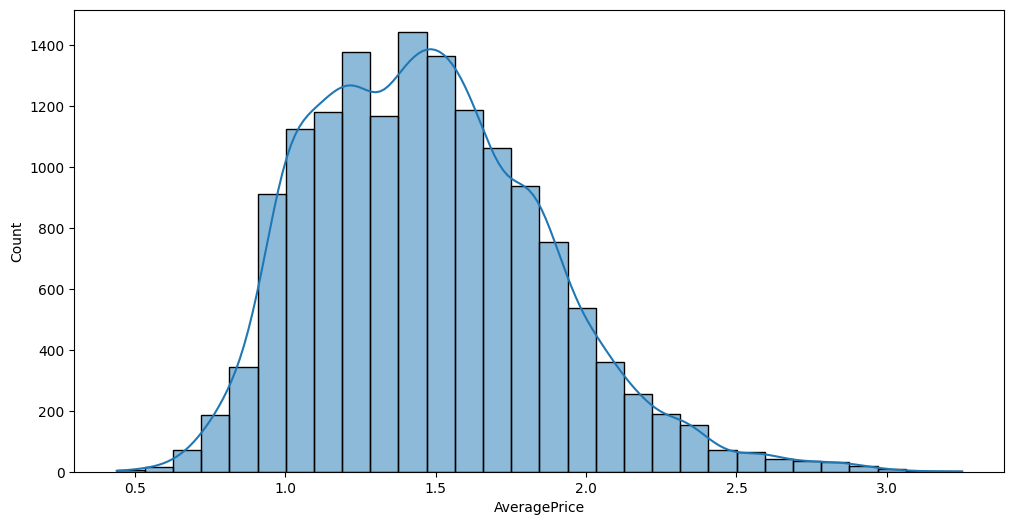

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.show()

Se graficó la distribución inicial de AveragePrice, donde se observa que, aunque la mayoría de los precios se concentran entre 1 y 2 dólares, existen valores alejados del centro de la distribución.
Esto sugiere la presencia de outliers que podrían afectar negativamente los modelos de regresión.

### Cálculo de Z-Score y detección de outliers
- Se calcularon los puntajes Z para la variable AveragePrice.
- Los valores con un puntaje Z mayor a 2.5 fueron considerados outliers, ya que se encuentran muy alejados de la media del conjunto.
- Se listaron y ordenaron estos outliers para analizar su magnitud antes de eliminarlos.

In [23]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['AveragePrice']))  # Calcular el puntaje z
threshold = 2.5  # Definir el umbral para considerar un valor como atípico
outliers = df[z_scores > threshold]  # Filtrar los valores atípicos
outliers = outliers.sort_values(by='AveragePrice')
outliers

,Date,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Dias_Desde_Primer_Registro
15261,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.0,ORGANIC,2017,CINCINNATI_DAYTON,791
15473,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.0,ORGANIC,2017,DETROIT,791
15262,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.0,ORGANIC,2017,CINCINNATI_DAYTON,784
13396,2016-11-06,2.46,25247.34,3242.75,19599.49,138.68,2266.42,2220.62,45.80,0.0,ORGANIC,2016,NEW_YORK,672
15035,2017-06-11,2.46,5165.43,4.78,644.84,0.00,4515.81,1073.33,3442.48,0.0,ORGANIC,2017,BUFFALO_ROCHESTER,889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,ORGANIC,2017,RALEIGH_GREENSBORO,966
16055,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,ORGANIC,2017,MIAMI_FT_LAUDERDALE,798
14124,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,ORGANIC,2016,SAN_FRANCISCO,672
17428,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,ORGANIC,2017,TAMPA,833


### Eliminación de outliers en AveragePrice
Se filtraron los registros que cumplen con la condición de tener un puntaje Z menor al umbral definido.
Esto permitió eliminar los precios anómalos y mantener únicamente observaciones coherentes con el comportamiento general del mercado.

In [24]:
df = df[(z_scores < threshold)]  # Eliminar los valores atípicos del DataFrame original
df

,Date,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Dias_Desde_Primer_Registro
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,CONVENTIONAL,2015,ALBANY,357
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,CONVENTIONAL,2015,ALBANY,350
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,CONVENTIONAL,2015,ALBANY,343
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,CONVENTIONAL,2015,ALBANY,336
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,CONVENTIONAL,2015,ALBANY,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1127
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1120
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1113
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1106


### Revisión de la distribución de Total Volume tras la limpieza final
Se graficó nuevamente Total Volume para validar que, tras todas las fases de limpieza de datos, la variable sigue mostrando un comportamiento lógico.
El volumen de ventas se concentra en valores bajos y disminuye progresivamente, reflejando de manera coherente el patrón esperado en el mercado.

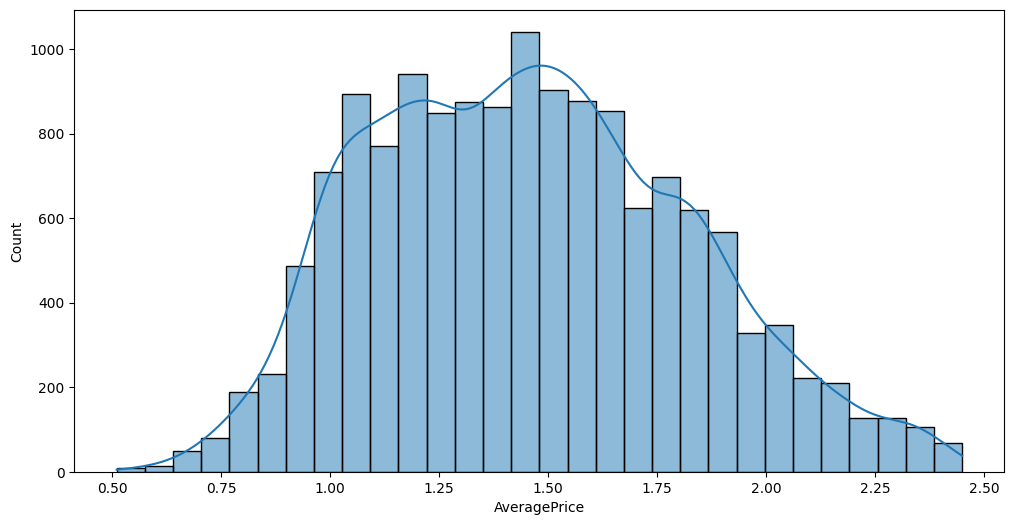

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.show()

La distribución final de `AveragePrice` muestra una curva bastante simétrica, con la mayoría de los precios concentrados entre 1.00 y 1.75 dólares. La ligera asimetría a la derecha se considera normal en mercados reales. Esta distribución confirma que la eliminación de valores atípicos mediante Z-Score fue efectiva para estabilizar la variable sin deformar su comportamiento natural, preparando adecuadamente el dato para tareas de regresión.

### Gráfica: Distribución de `Total Volume` tras limpieza general

<function matplotlib.pyplot.show(close=None, block=None)>

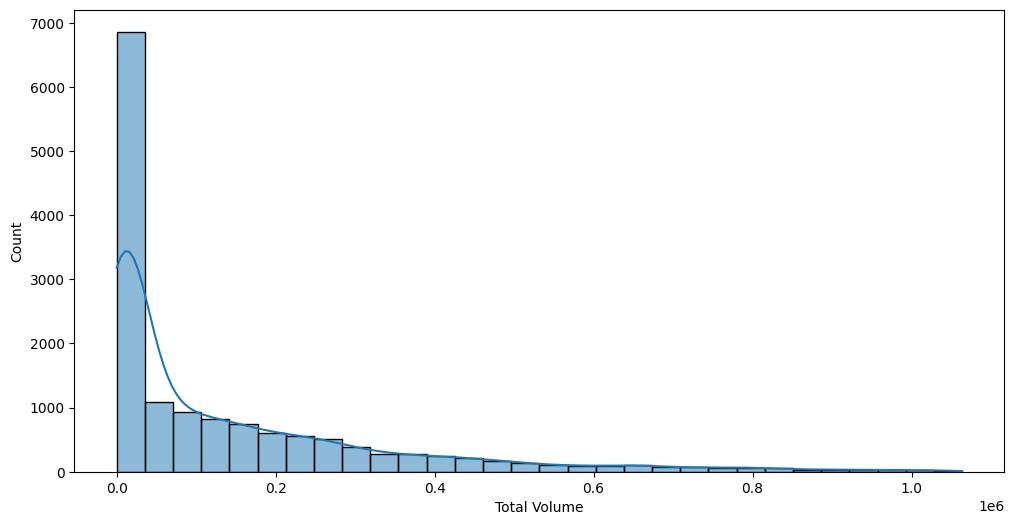

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Volume'], bins=30, kde=True)
plt.show

El gráfico confirma que la variable conserva su tendencia lógica, caracterizada por una mayor frecuencia de ventas en volúmenes bajos, con un decrecimiento paulatino hacia valores más elevados.
Esta validación gráfica refuerza que los datos están listos para ser utilizados en los modelos predictivos sin necesidad de transformaciones adicionales.

## Estandarización de datos con minmaxscaler

En este proyecto se optó por usar **MinMaxScaler** para la normalización de variables numéricas.  
El método MinMax transforma los datos reescalándolos a un rango definido (por defecto [0, 1]).  
Este tipo de normalización es especialmente útil cuando:

- Los datos no siguen una distribución normal estricta (como `Total Volume`).
- Se desea preservar la forma original de la distribución (sin cambiar su asimetría ni la separación relativa de valores).
- Se van a utilizar algoritmos sensibles a la escala de los datos, como redes neuronales o modelos basados en distancia.

##  Normalización de variables numéricas
Se aplicó MinMaxScaler a todas las variables numéricas relevantes del dataset para llevar sus valores al rango [0, 1].
Esto garantiza que ninguna variable domine a las demás en el proceso de entrenamiento de modelos, especialmente cuando se combinan diferentes escalas de magnitud.

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Normalización y estandarización de datos
scaler = MinMaxScaler()
df.loc[:, 'AveragePrice'] = scaler.fit_transform(df[['AveragePrice']])
df.loc[:, 'Total Volume'] = scaler.fit_transform(df[['Total Volume']])
df.loc[:, 'Total Bags'] = scaler.fit_transform(df[['Total Bags']])
df.loc[:, 'Small Bags'] = scaler.fit_transform(df[['Small Bags']])
df.loc[:, 'Large Bags'] = scaler.fit_transform(df[['Large Bags']])
df.loc[:, 'XLarge Bags'] = scaler.fit_transform(df[['XLarge Bags']])
df.loc[:, 'Pequeño/Mediano'] = scaler.fit_transform(df[['Pequeño/Mediano']])
df.loc[:, 'Grande'] = scaler.fit_transform(df[['Grande']])
df.loc[:, 'Extra Grande'] = scaler.fit_transform(df[['Extra Grande']])

### Visualización de las distribuciones normalizadas

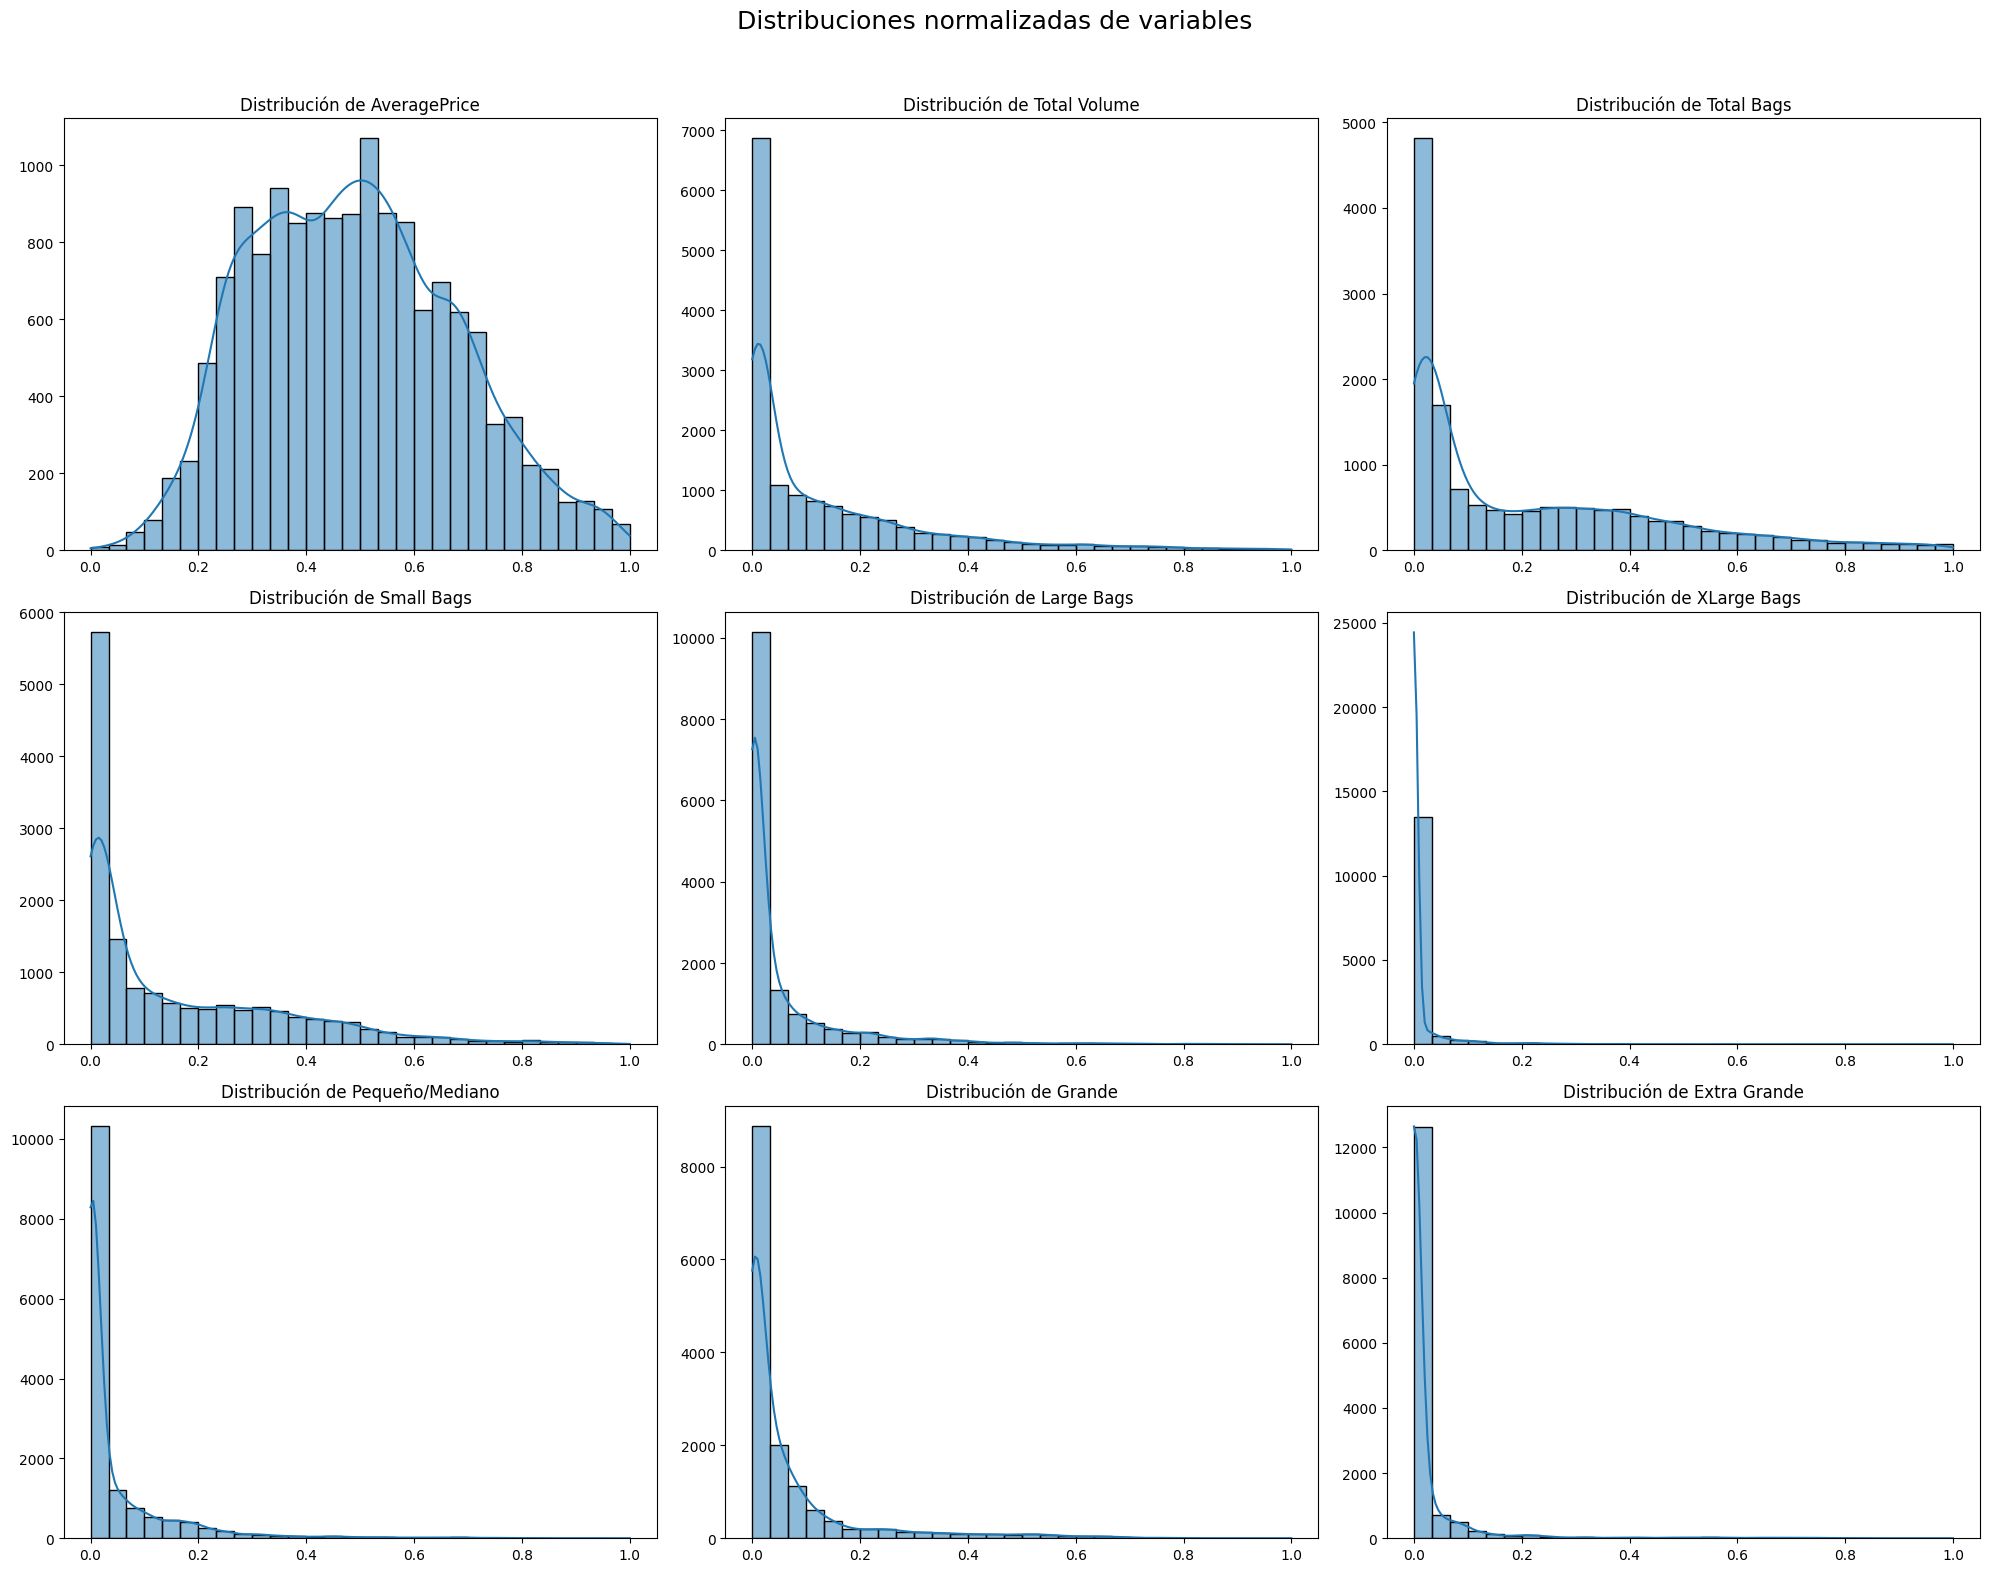

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas a graficar
columnas = ['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 
            'XLarge Bags', 'Pequeño/Mediano', 'Grande', 'Extra Grande']

# Configurar el tamaño de la figura general
plt.figure(figsize=(20, 16))
plt.suptitle("Distribuciones normalizadas de variables", fontsize=18)

# Graficar cada histograma en un subplot
for i, columna in enumerate(columnas, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas (ajustable)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f"Distribución de {columna}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Para que no se traslape con el título principal
plt.show()


# Análisis de las distribuciones normalizadas de variables

Se visualizó el comportamiento de las principales variables numéricas tras aplicar la normalización mediante **MinMaxScaler**.

 **Análisis general:**
- **Preservación de forma:** Todas las variables mantuvieron su forma original de distribución, respetando su tendencia natural. Esto confirma que MinMaxScaler reescaló correctamente sin deformar los datos.
- **Rango [0, 1]:** Todas las distribuciones están ahora limitadas entre 0 y 1, cumpliendo el objetivo de estandarización para mejorar la estabilidad y el rendimiento en los modelos predictivos.


###  Variable: `AveragePrice`

- Se observa una distribución ligeramente asimétrica hacia la derecha, con el grueso de los precios concentrados entre 0.3 y 0.7 en la nueva escala.
- La curva KDE muestra suavidad y continuidad, confirmando que la eliminación de outliers previa y la normalización fueron exitosas.


###  Variables: `Total Volume`, `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags`, `Pequeño/Mediano`, `Grande`, `Extra Grande`

- Todas estas variables presentan distribuciones altamente sesgadas hacia la izquierda (concentradas cerca de 0).
- La mayoría de los datos representa volúmenes de venta bajos o cantidades reducidas, mientras que muy pocos registros alcanzan valores altos dentro del rango normalizado.
- Este comportamiento es coherente con el mercado real, donde las ventas pequeñas son mucho más comunes que los volúmenes masivos.



#  Codificación de variables categóricas: conversión de `type` a variable dummy
En esta etapa se transformó la variable categórica `type` en variables numéricas utilizando **One-Hot Encoding**.  
Se tomó la decisión de **eliminar la primera categoría** (`drop='first'`) para **evitar la trampa de la variable ficticia** (dummy variable trap), lo cual es una buena práctica en modelos de regresión para prevenir colinealidad perfecta entre las variables.


**Justificación de la decisión:**
- La codificación One-Hot permite que los algoritmos de machine learning interpreten correctamente variables categóricas.
- Al eliminar una de las categorías (`drop='first'`), se evita redundancia y se mejora la estabilidad del modelo.
- Se optó por `handle_unknown='ignore'` para que el modelo pueda manejar nuevas categorías si se presentan en producción sin errores.

### Codificación de `type` en variables dummy

In [29]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Evitar la trampa de la variable ficticia
encoded_type = encoder.fit_transform(df[['type']])
type_columns = encoder.get_feature_names_out(['type'])
encoded_df = pd.DataFrame(encoded_type, columns=type_columns)
df = df.reset_index(drop=True).join(encoded_df)  # Reiniciar el índice del DataFrame original
df

,Date,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Dias_Desde_Primer_Registro,type_ORGANIC
0,2015-12-27,0.422680,0.060322,0.001258,0.062893,0.000250,0.047659,0.047334,0.000576,0.0,CONVENTIONAL,2015,ALBANY,357,0.0
1,2015-12-20,0.432990,0.051521,0.000818,0.051556,0.000303,0.052091,0.051760,0.000602,0.0,CONVENTIONAL,2015,ALBANY,350,0.0
2,2015-12-13,0.216495,0.111082,0.000964,0.126063,0.000678,0.044637,0.044246,0.000637,0.0,CONVENTIONAL,2015,ALBANY,343,0.0
3,2015-12-06,0.293814,0.074196,0.001374,0.083129,0.000377,0.031845,0.031235,0.000827,0.0,CONVENTIONAL,2015,ALBANY,336,0.0
4,2015-11-29,0.396907,0.047913,0.001142,0.050631,0.000394,0.033888,0.032934,0.001222,0.0,CONVENTIONAL,2015,ALBANY,329,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14671,2018-02-04,0.577320,0.015976,0.002484,0.001766,0.000000,0.073973,0.071889,0.002669,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1127,1.0
14672,2018-01-28,0.618557,0.012979,0.001446,0.003963,0.000000,0.050772,0.049185,0.002007,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1120,1.0
14673,2018-01-21,0.701031,0.012865,0.001446,0.002833,0.003783,0.051480,0.051450,0.000261,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1113,1.0
14674,2018-01-14,0.731959,0.015158,0.001854,0.003443,0.003778,0.060113,0.060076,0.000309,0.0,ORGANIC,2018,WEST_TEX_NEW_MEXICO,1106,1.0


### Eliminación de columnas innecesarias: `type`, `year` y `Date`
La columna original `type` fue eliminada, ya que su información ya está representada en las variables dummy y se eliminaron `year` y `Date` porque ya se había creado una variable temporal más útil (`Dias_Desde_Primer_Registro`) que captura la información temporal de manera más eficiente y numérica, facilitando el trabajo de los modelos.

In [30]:

df= df.drop(columns=['type'])
df= df.drop(columns=['year'])
df= df.drop(columns=['Date'])
df

,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Dias_Desde_Primer_Registro,type_ORGANIC
0,0.422680,0.060322,0.001258,0.062893,0.000250,0.047659,0.047334,0.000576,0.0,ALBANY,357,0.0
1,0.432990,0.051521,0.000818,0.051556,0.000303,0.052091,0.051760,0.000602,0.0,ALBANY,350,0.0
2,0.216495,0.111082,0.000964,0.126063,0.000678,0.044637,0.044246,0.000637,0.0,ALBANY,343,0.0
3,0.293814,0.074196,0.001374,0.083129,0.000377,0.031845,0.031235,0.000827,0.0,ALBANY,336,0.0
4,0.396907,0.047913,0.001142,0.050631,0.000394,0.033888,0.032934,0.001222,0.0,ALBANY,329,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14671,0.577320,0.015976,0.002484,0.001766,0.000000,0.073973,0.071889,0.002669,0.0,WEST_TEX_NEW_MEXICO,1127,1.0
14672,0.618557,0.012979,0.001446,0.003963,0.000000,0.050772,0.049185,0.002007,0.0,WEST_TEX_NEW_MEXICO,1120,1.0
14673,0.701031,0.012865,0.001446,0.002833,0.003783,0.051480,0.051450,0.000261,0.0,WEST_TEX_NEW_MEXICO,1113,1.0
14674,0.731959,0.015158,0.001854,0.003443,0.003778,0.060113,0.060076,0.000309,0.0,WEST_TEX_NEW_MEXICO,1106,1.0


### Exportación del dataset procesado
Se exportó el DataFrame procesado a un archivo CSV llamado `avocado_transformado.csv`, asegurando que todos los pasos de preprocesamiento puedan ser reutilizados en futuros entrenamientos de modelos sin necesidad de repetir todo el pipeline de limpieza.

In [31]:
df.to_csv('avocado_transformado.csv', index=False)

### Inspección final del dataset
Se realizó una inspección general del DataFrame final para verificar el correcto tipo de datos en cada columna, que no existan columnas categóricas sin procesar y que la estructura del dataset esté lista para iniciar el análisis exploratorio (EDA) y el modelado predictivo.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                14676 non-null  float64
 1   Total Volume                14676 non-null  float64
 2   Pequeño/Mediano             14676 non-null  float64
 3   Grande                      14676 non-null  float64
 4   Extra Grande                14676 non-null  float64
 5   Total Bags                  14676 non-null  float64
 6   Small Bags                  14676 non-null  float64
 7   Large Bags                  14676 non-null  float64
 8   XLarge Bags                 14676 non-null  float64
 9   region                      14676 non-null  object 
 10  Dias_Desde_Primer_Registro  14676 non-null  int64  
 11  type_ORGANIC                14676 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.3+ MB
